# **TFM - CLAIMS INSURANCE**

El objetivo es estudiar el dataset para analizar el comportamiento de los clientes sdel seguro, para ver si podemos predecir qué clientes serían susceptibles de presentar una reclamación económica (variable objetivo OUTCOME). Por ejemplo, cómo afectaría el sexo, rangos de edad, familia, experiencia, uso del coche, tener accidentes, etc. Y sobre todo analizar si podemos determinar qué factores (variables) son más determinantes a la hora de hacer predicciones. De esa forma podremos seguir una estrategia para calcular las pólizas de los clientes.

Para ello seguiremos los siguientes pasos:

1.- Entender el problema de negocio.

2- Limpieza y EDA:
> A.- LLevaremos a cabo una tarea de limpieza de los datos, el cual incluirá:
>>- a) Analizar si hay valores nulos y la mejor forma de resolver éstos.
>>- b) Analizar si hay outliers y la mejor forma de resorlver éstos.

> B.- Llevaremos a cabo un EDA, el cual incluirá:
>>- a) Analizar si la variable target en el dataset esta balanceada (es decir, que ni el "no" ni el "si" en OUTCOME, tienen un peso demasiado grande respecto al otro).
>>- b) Analizar todas la variables entre ellas para ver distribuciones y correlaciones, si hay correlaciones entre ellas, y entre éstas y la variable target, y eliminaremos aquellas altamente correlacionadas entre sí, dejando la que esté mas correlaconada con la variabe target.
      
3.- Llevaremos a cabo un PCA.

4.- Obtendremos un dataset limpio y preparado para llevar a cabo dos modelos de machine learning que nos ayuden a hacer las predicciones necesarias.

5.- Modelo 1: Regresión Logarítmica

6.- Modelo 2: SVM


# 1.- Entender el problema de negocio

El dataset se compone de 10,000 registros y 19 variables, entre ellas la variable target (OUTCOME):

- 1) ID: entero; identificador de registro

- 2) AGE: texto; edad del cliente -- 4 categorias TEXTO

- 3) GENDER: texto; género del cliente --2 categorias TEXTO

- 4) RACE: texto; pertenencia a minoría racial -- 2 categorias TEXTO

- 5) DRIVING_EXPERIENCE: texto; antigüedad de carnet -- 4 categorias TEXTO

- 6) EDUCATION: texto; nivel de estudios --3 categorias TEXTO

- 7) INCOME: texto; nivel de ingresos --3 categorias TEXTO

- 8) CREDIT_SCORE: numérico; capacidad de (responder a) crédito --NUMERICO

- 9) VEHICLE_OWNERSHIP: numérico; indicador de propiedad del vehículo (no/si) ---2 categorias NUMERICO 

- 10) VEHICLE_YEAR: texto; antigüedad del vehículo --2 categorias TEXTO

- 11) MARRIED: numérico; indicador de estar casado/a (no/si) -- 2 categorias NUMERICO

- 12) CHILDREN: numérico; indicador de tener hijos (no/si) --2 categorias NUMERICO

- 13) POSTAL_CODE: entero; código postal --NUMERICO

- 14) ANNUAL_MILEAGE: numérico; millas recorridas al año --NUMERICO

- 15) VEHICLE_TYPE: texto; tipo de coche --2 categorias TEXTO

- 16) SPEEDING_VIOLATIONS: entero; número de sanciones por exceso de velocidad --NUMERICO

- 17) DUIS: entero; (Driving Under InfluenceS) conducción bajo el efecto de medicamentos, drogas o alcohol --NUMERICO

- 18) PAST_ACCIDENTS: entero; partes de accidentes --NUMERICO del 0 al 15

- 19) OUTCOME: numérico; indicador de reclamación económica efectuada (no/si) -- 2 categorias NUMERICO






Despues de revisar y analizar cada una de las variables y entender su relevancia para este proyecto, se deciden los siguientes puntos:

> A) Se retira la variable ID al no ser relevante.

> B) Se identifican dos variables cuya inclusión en el modelo podría tener una implicación legal (GENDER y RACE), pero depues de discutirlo con el departamento legal se decide que se pueden incluir en el modelo.

> C) El decide quitar el POSTAL CODE, esta variable puede producir informacion de dos tipos: geolocalizacion (estado, ciudad, vecindad) e información referente al nivel socioeconomico. Como no se dispone de la informacion geolocalizable para ver qué estado o ciudad se localiza, y como el nivel socioeconomico ya viene porporcionado en otras dos variables (INCOME, EDUCATION) se decide retirar esta variable del dataset.

> D) No se identifica ninguna otra variable que se considere no relevante para OUTCOME, así como tampoco se identifica ninguna variable como "falso predictor" por ser una consecuencia del OUTCOME más que un indiador predictivo.
 



# 2.- EDA y Limpieza del Dataset:

In [6]:
# Importo las librerías básicas:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
%matplotlib inline

In [7]:
import os
os.getcwd()

'C:\\Users\\Cristina\\Desktop\\VFINAL  MASTER_AEPI_2022\\ENTREGAS\\PRACTICA_2'

In [12]:
# Importo los datos
df = pd.read_csv("Car_Insurance_Claim.csv",  sep = ",")

In [13]:
# Tamaño y estructura de df
df.shape

(10000, 19)

In [15]:
df.head(10)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
5,877557,40-64,female,majority,20-29y,high school,upper class,0.619127,1.0,after 2015,0.0,1.0,10238,13000.0,sedan,3,0,3,0.0
6,930134,65+,male,majority,30y+,high school,upper class,0.492944,0.0,after 2015,1.0,1.0,10238,13000.0,sedan,7,0,3,0.0
7,461006,26-39,female,majority,0-9y,university,working class,0.468689,0.0,after 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,1.0
8,68366,40-64,female,majority,20-29y,university,working class,0.521815,0.0,before 2015,1.0,0.0,10238,13000.0,sedan,0,0,0,0.0
9,445911,40-64,female,majority,0-9y,high school,upper class,0.561531,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,1.0


In [16]:
# Realizamos un describe de las variables numericas
df.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [17]:
# Realizamos un describe de las variables categoricas
df.describe(include=['O'])

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,4,2,2,4,3,4,2,2
top,26-39,female,majority,0-9y,high school,upper class,before 2015,sedan
freq,3063,5010,9012,3530,4157,4336,6967,9523


In [18]:
# Se retira del df la variable ID y POSTAL_CODE como se acordó anteriormente en el ANALISIS DE NEGOCIO
df = df.drop(labels='ID', axis=1)

In [19]:
df = df.drop(labels='POSTAL_CODE', axis=1)

In [20]:
df.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,12000.0,sedan,0,0,0,0.0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,16000.0,sedan,0,0,0,1.0
2,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,11000.0,sedan,0,0,0,0.0
3,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,11000.0,sedan,0,0,0,0.0
4,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,12000.0,sedan,2,0,1,1.0


## Analisis de la variable target

In [21]:
df.groupby(["OUTCOME"]).mean()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
OUTCOME,,,,,,,,
0.0,0.546092,0.814621,0.586719,0.761614,11342.852559,1.924858,0.310179,1.403961
1.0,0.449571,0.439196,0.304181,0.529205,12482.562278,0.514204,0.083626,0.294287


In [22]:
df['OUTCOME'].describe()

count    10000.000000
mean         0.313300
std          0.463858
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: OUTCOME, dtype: float64

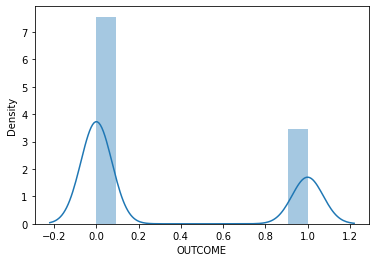

In [23]:
# Histograma
sns.distplot(df['OUTCOME'])

## Simplificación de datos


In [25]:
# Todas la variables categoricas que tengan más de 2 categorias y no sean numericas las vamos a pasar de str a int.
# Las variables categoricas no numericas de solo 2 categorias las dummizaremos 

#A) AGE:

df["AGE"] = df["AGE"].map({'16-25':0,'26-39':1,'40-64':2,'65+':3}).astype(int)

In [26]:
df.AGE.unique()

array([3, 0, 1, 2])

In [27]:
#B) DRIVING_EXPIRIENCE:

df["DRIVING_EXPERIENCE"] = df["DRIVING_EXPERIENCE"].map({'0-9y':0,'10-19y':1,'20-29y':2,'30y+':3}).astype(int)

In [28]:
df.DRIVING_EXPERIENCE.unique()

array([0, 1, 2, 3])

In [29]:
#C) EDUCATION:

df["EDUCATION"] = df["EDUCATION"].map({'none':0,'high school':1,'university':2}).astype(int)

In [30]:
df.EDUCATION.unique()

array([1, 0, 2])

In [34]:
#D) INCOME (usamos "float" en lugar de "int" porque hay valores nulos que "float" permite pero "int" no y daria error)

df["INCOME"] = df["INCOME"].map({'poverty':0,'working class':1,'upper class':2}).astype(float)

In [35]:
df.INCOME.unique()

array([ 2.,  0.,  1., nan])

In [36]:
# Dummificamos el resto de variables
df2 = pd.get_dummies(df)

In [37]:
df2.head ()

,AGE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,...,PAST_ACCIDENTS,OUTCOME,GENDER_female,GENDER_male,RACE_majority,RACE_minority,VEHICLE_YEAR_after 2015,VEHICLE_YEAR_before 2015,VEHICLE_TYPE_sedan,VEHICLE_TYPE_sports car
0,3,0,1,2.0,0.629027,1.0,0.0,1.0,12000.0,0,...,0,0.0,1,0,1,0,1,0,1,0
1,0,0,0,0.0,0.357757,0.0,0.0,0.0,16000.0,0,...,0,1.0,0,1,1,0,0,1,1,0
2,0,0,1,1.0,0.493146,1.0,0.0,0.0,11000.0,0,...,0,0.0,1,0,1,0,0,1,1,0
3,0,0,2,1.0,0.206013,1.0,0.0,1.0,11000.0,0,...,0,0.0,0,1,1,0,0,1,1,0
4,1,1,0,1.0,0.388366,1.0,0.0,0.0,12000.0,2,...,1,1.0,0,1,1,0,0,1,1,0


## Limpiamos y/o ajustamos el dataset si necesario de nulos y outliers

### A) Datos Nulos:

In [38]:
# Missing data: vamos a analizar la prevalencia y aleatoriedad de los datos faltantes
total = df2.isnull().sum().sort_values(ascending = False)
percent = (df2.isnull().sum() / df2.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
INCOME,2138,0.2138
CREDIT_SCORE,982,0.0982
ANNUAL_MILEAGE,957,0.0957
AGE,0,0.0000
OUTCOME,0,0.0000
VEHICLE_TYPE_sedan,0,0.0000
VEHICLE_YEAR_before 2015,0,0.0000
VEHICLE_YEAR_after 2015,0,0.0000
RACE_minority,0,0.0000
RACE_majority,0,0.0000


Como podemos ver en la tabla superior, INCOME es la única variable que tiene un % relevante de nulos (21.4%). Ante esto podemos optar por:
> - A) Deshacernos de esta variable del todo /eliminar la columna entera). 
> - B) Rellenar los nulos con utilizando un average o un KNN de esa misma variable o de otra variable.
> - C) Rellenar los nulos con los valores de otra variable (es decir de otra columna).
> - D) Utilizar esa columna con los nulos tal y cómo se encuentra ((ESTO NO ES UNA OPCION PORQUE EL PCA NO FUNCIONARIA))

Despues de sopesar las tres opciones, se opta por:

>- INCOME: como esta variable es categorica, no tiene sentido utilizar un average de si misma, ni un KNN de si misma porque los clientes estan colocados de forma random. Aí pues se decide rellenar los valores nulos con los valores que tiene otra variable (columna) en este caso se decide que sea EDUCATION porque cuando se estudian las correlaciones, se identifica que hay correlación entre estas dos variables.
>- CREDIT_SCORE: se eliminará esta variable del todo por correlacion alta con otra variable más mportante.
>- ANNUAL_MILEAGE: al haber muy pocos datos nulos se decide eliminar estas filas que contienen nulos.

NOTA: LA APLICACIÓN DE ESTOS AJUSTES SE REALIZA AL FINAL DEL EDA, POR UN ERROR EN LA ORGANIZACION DE JUPYTER NOTEBOOK



### B) Outliers:

----------------------------------------------------------------------
Histogramas de las variables continuas
----------------------------------------------------------------------


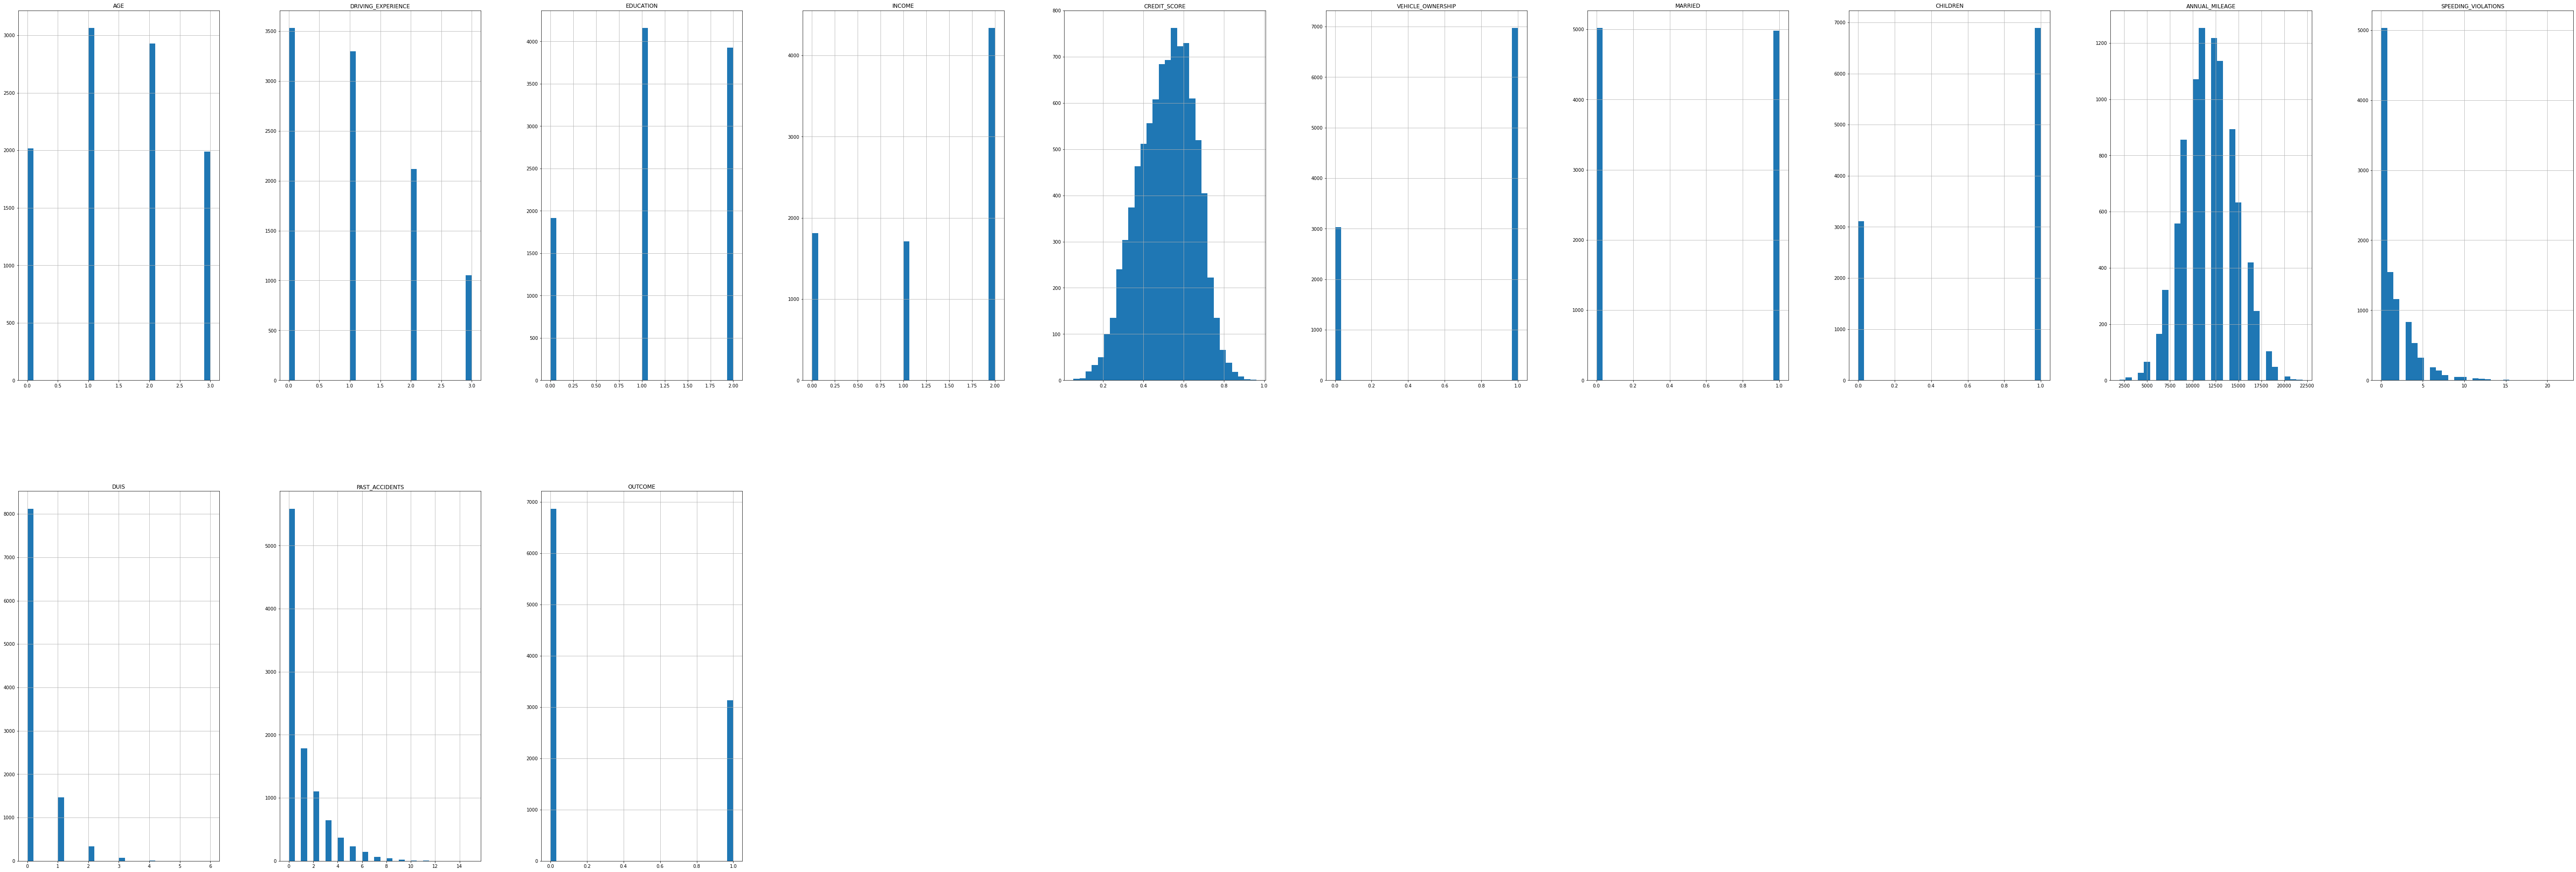

In [46]:
# Vamos a ver la distribución (histogramas) la las variables numericas (floats e integers)

print('-'*70)
print('Histogramas de las variables continuas')
print('-'*70)
df.hist(bins=30, figsize=(100, 150),layout=(8,10))
plt.show()

Tal y como podemos ver en los histogramas superiores no parace haber un problema de outliers en el dataset. De cualquier forma se decide no eliminarlos ya que el modelo que se va a realizar, Regresión Logaritmica, no se ve impactada por la existencia de ouliers ya que la funcion sigmoide desecha los outliers

## Analisis de las Correlaciones

In [47]:
# Analizamos la correlacion entre todas las variables para tener una visión general
corr_all = df2.corr()
corr_all

,AGE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,...,PAST_ACCIDENTS,OUTCOME,GENDER_female,GENDER_male,RACE_majority,RACE_minority,VEHICLE_YEAR_after 2015,VEHICLE_YEAR_before 2015,VEHICLE_TYPE_sedan,VEHICLE_TYPE_sports car
AGE,1.000000,0.707393,0.260793,0.698709,0.495495,0.272140,0.384759,0.383708,-0.278073,0.458413,...,0.431061,-0.448463,-0.005929,0.005929,0.011645,-0.011645,0.235390,-0.235390,0.008463,-0.008463
DRIVING_EXPERIENCE,0.707393,1.000000,0.180533,0.494443,0.344119,0.202788,0.269942,0.277546,-0.187520,0.637306,...,0.604699,-0.497431,-0.007511,0.007511,0.020461,-0.020461,0.164915,-0.164915,0.008554,-0.008554
EDUCATION,0.260793,0.180533,1.000000,0.613417,0.412549,0.236347,0.195583,0.123735,-0.129150,0.140876,...,0.124718,-0.189357,-0.079606,0.079606,0.114018,-0.114018,0.203394,-0.203394,0.003194,-0.003194
INCOME,0.698709,0.494443,0.613417,1.000000,0.770082,0.471253,0.434962,0.324675,-0.290023,0.333172,...,0.314294,-0.469235,-0.031272,0.031272,0.060151,-0.060151,0.391936,-0.391936,0.012532,-0.012532
CREDIT_SCORE,0.495495,0.344119,0.412549,0.770082,1.000000,0.312037,0.281238,0.220658,-0.174453,0.204542,...,0.180978,-0.325286,0.081587,-0.081587,0.039359,-0.039359,0.267560,-0.267560,0.013871,-0.013871
VEHICLE_OWNERSHIP,0.272140,0.202788,0.236347,0.471253,0.312037,1.000000,0.175626,0.125990,-0.097433,0.133868,...,0.119521,-0.378921,-0.007385,0.007385,0.034738,-0.034738,0.158579,-0.158579,-0.005647,0.005647
MARRIED,0.384759,0.269942,0.195583,0.434962,0.281238,0.175626,1.000000,0.287009,-0.462193,0.218855,...,0.215269,-0.262104,-0.008393,0.008393,0.021597,-0.021597,0.129638,-0.129638,-0.006905,0.006905
CHILDREN,0.383708,0.277546,0.123735,0.324675,0.220658,0.125990,0.287009,1.000000,-0.447655,0.220415,...,0.206295,-0.232835,0.002640,-0.002640,-0.007575,0.007575,0.105189,-0.105189,0.008672,-0.008672
ANNUAL_MILEAGE,-0.278073,-0.187520,-0.129150,-0.290023,-0.174453,-0.097433,-0.462193,-0.447655,1.000000,-0.323547,...,-0.195217,0.187154,0.015845,-0.015845,0.001983,-0.001983,-0.077363,0.077363,0.010488,-0.010488
SPEEDING_VIOLATIONS,0.458413,0.637306,0.140876,0.333172,0.204542,0.133868,0.218855,0.220415,-0.323547,1.000000,...,0.443074,-0.291862,-0.202095,0.202095,0.014068,-0.014068,0.102700,-0.102700,-0.001812,0.001812


In [52]:
# Hacemos un zoom para ver las variables mas correlacionas entre si (excluyendo la varable target)

corr_sorted = corr_all.unstack().sort_values()


corr_filtered = corr_sorted[((corr_sorted >= .5) | (corr_sorted <= -.5)) & (corr_sorted <1)]
corr_filtered


VEHICLE_YEAR_after 2015   VEHICLE_YEAR_before 2015   -1.000000
VEHICLE_YEAR_before 2015  VEHICLE_YEAR_after 2015    -1.000000
VEHICLE_TYPE_sports car   VEHICLE_TYPE_sedan         -1.000000
VEHICLE_TYPE_sedan        VEHICLE_TYPE_sports car    -1.000000
GENDER_male               GENDER_female              -1.000000
GENDER_female             GENDER_male                -1.000000
RACE_minority             RACE_majority              -1.000000
RACE_majority             RACE_minority              -1.000000
PAST_ACCIDENTS            DRIVING_EXPERIENCE          0.604699
DRIVING_EXPERIENCE        PAST_ACCIDENTS              0.604699
EDUCATION                 INCOME                      0.613417
INCOME                    EDUCATION                   0.613417
SPEEDING_VIOLATIONS       DRIVING_EXPERIENCE          0.637306
DRIVING_EXPERIENCE        SPEEDING_VIOLATIONS         0.637306
INCOME                    AGE                         0.698709
AGE                       INCOME                      0

<AxesSubplot:>

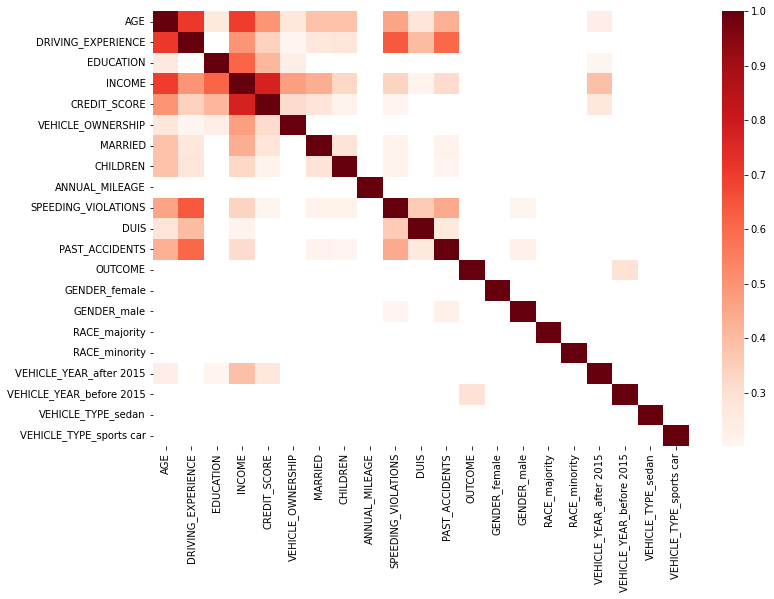

In [49]:
# Vemos las variables mas correlacionas con la variable target en un grafico
kot = corr_all[corr_all>=.2]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Reds")

In [50]:
# Vemos las variables mas correlacionas con la variable target en una lista rankeada
corr_all[['OUTCOME']].sort_values(by = 'OUTCOME',ascending = False).style.background_gradient()


,OUTCOME
OUTCOME,1.000000
VEHICLE_YEAR_before 2015,0.294178
ANNUAL_MILEAGE,0.187154
GENDER_male,0.107208
RACE_minority,0.008280
VEHICLE_TYPE_sports car,0.005620
VEHICLE_TYPE_sedan,-0.005620
RACE_majority,-0.008280
GENDER_female,-0.107208
DUIS,-0.189352


Tal y como podemos ver en una de las tablas superiores, hay una alta correlacion entre las siguientes variables (excluyendo la variable target):
1.- Entre INCOME y CREDIT SCORE: 0.77
2.- Entre AGE y DRIVING_EXPERIENCE: 0.70
3.- Entre AGE e INCOME :0.64
4.- Entre INCOME y EDUCATION: 0.61
5.- Entre DRIVING_EXPERIENCE y PAST_ACCIDENTS:0.60

Es sorprendente que no aparezca entre esta lista una alta relación entre DUIS y SPEEDING_VIOLATIONS.



Todas esta correlaciones tienen todo el sentido, así pues procedemos a hacer algunas eliminaciones de variables en función de la correlación que cada una de ellas tenga con la variable target (se elimina la que tenga menor corr con la variable target) y el sentido de negocio:
1.- Entre INCOME y CREDIT SCORE: eliminamos CREDIT SCORE
2.- Entre AGE y DRIVING_EXPERIENCE: eliminamos AGE
3.- Entre AGE e INCOME :0.64 eliminamos AGE
4.- Entre INCOME y EDUCATION: eliminamos EDUCATION
5.- Entre DRIVING_EXPERIENCE y PAST_ACCIDENTS: no vamos a eliminar ninguna de las dos por sentido del negocio, puede ser que haya malos conductores con experiencia que se comporten de una determinada manera en relación al OUTCOME.


In [53]:
# Se retira del df2 las variables CREDIT_SCORE, AGE y EDUCATION como se establece anteriormente
df2 = df2.drop(labels='CREDIT_SCORE', axis=1)

In [54]:
df2 = df2.drop(labels='AGE', axis=1)

In [55]:
df2 = df2.drop(labels='EDUCATION', axis=1)

In [56]:
df2.head()

,DRIVING_EXPERIENCE,INCOME,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,GENDER_female,GENDER_male,RACE_majority,RACE_minority,VEHICLE_YEAR_after 2015,VEHICLE_YEAR_before 2015,VEHICLE_TYPE_sedan,VEHICLE_TYPE_sports car
0,0,2.0,1.0,0.0,1.0,12000.0,0,0,0,0.0,1,0,1,0,1,0,1,0
1,0,0.0,0.0,0.0,0.0,16000.0,0,0,0,1.0,0,1,1,0,0,1,1,0
2,0,1.0,1.0,0.0,0.0,11000.0,0,0,0,0.0,1,0,1,0,0,1,1,0
3,0,1.0,1.0,0.0,1.0,11000.0,0,0,0,0.0,0,1,1,0,0,1,1,0
4,1,1.0,1.0,0.0,0.0,12000.0,2,0,1,1.0,0,1,1,0,0,1,1,0


In [57]:
df2.shape

(10000, 18)

In [58]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DRIVING_EXPERIENCE        10000 non-null  int32  
 1   INCOME                    7862 non-null   float64
 2   VEHICLE_OWNERSHIP         10000 non-null  float64
 3   MARRIED                   10000 non-null  float64
 4   CHILDREN                  10000 non-null  float64
 5   ANNUAL_MILEAGE            9043 non-null   float64
 6   SPEEDING_VIOLATIONS       10000 non-null  int64  
 7   DUIS                      10000 non-null  int64  
 8   PAST_ACCIDENTS            10000 non-null  int64  
 9   OUTCOME                   10000 non-null  float64
 10  GENDER_female             10000 non-null  uint8  
 11  GENDER_male               10000 non-null  uint8  
 12  RACE_majority             10000 non-null  uint8  
 13  RACE_minority             10000 non-null  uint8  
 14  VEHICLE


### 2º PARTE GESTION DE NULOS:
Ya que en el apartado de Nulos tomamos las decisiones pero no se gestionaron los "NaN" (nulos)-- hay nulos en INCOME y ANNUAL_MILEAGE

In [70]:
# Comprobamos, una vez mas, que efectivamente son 2 variables tienen NaN 

df2.isnull().sum()

DRIVING_EXPERIENCE             0
INCOME                      2138
VEHICLE_OWNERSHIP              0
MARRIED                        0
CHILDREN                       0
ANNUAL_MILEAGE               957
SPEEDING_VIOLATIONS            0
DUIS                           0
PAST_ACCIDENTS                 0
OUTCOME                        0
GENDER_female                  0
GENDER_male                    0
RACE_majority                  0
RACE_minority                  0
VEHICLE_YEAR_after 2015        0
VEHICLE_YEAR_before 2015       0
VEHICLE_TYPE_sedan             0
VEHICLE_TYPE_sports car        0
dtype: int64

In [78]:
### Se va a proceder a:
# - INCOME: como hay un 21% de valores nulos, se decide rellenar los valores nulos con los valores que tiene otra variable (columna) en este caso se decide que sea EDUCATION porque cuando se estudian las correlaciones, se identifica que hay correlación entre estas dos variables.
# - ANNUAL_MILEAGE: al haber muy pocos datos nulos se decide eliminar estas filas que contienen nulos de esa variable (columna)

# Empezamos por INCOME: pandas replace null values in INCOME with values from another column (EDUCATION)
df2["INCOME"].fillna(df["EDUCATION"], inplace=True)


In [79]:
df.EDUCATION.unique()

array([1, 0, 2])

In [80]:
df2.INCOME.unique()

array([2., 0., 1.])

In [89]:
# Ahora ajustamos ANNUAL MILEAGE:
# df2.ANNUAL_MILEAGE.dropna(how = "all") --NO FUNCIONÓ, no se por qué, no daba error pero cuando haciamos un "unique" seguia saliendo "nan"
# df2.dropna(axis=0, subset=['ANNUAL_MILEAGE']) --NO FUNCIONÓ ,no se por qué, no daba error pero cuando haciamos un "unique" seguia saliendo "nan"
df2.replace('-', np.nan, inplace = True)
df3 = df2.dropna()

In [90]:
df3.ANNUAL_MILEAGE.unique() ##Esto lo hacemos para ver si sí funcionó la eliminación (y no sale ningún "nan" en el array abajo, así que sí funcionó)

array([12000., 16000., 11000., 13000., 14000., 10000.,  8000., 18000.,
       17000.,  7000., 15000.,  9000.,  5000.,  6000., 19000.,  4000.,
        3000.,  2000., 20000., 21000., 22000.])

In [91]:
# Comprobamos, una vez mas, si hay NaN 

df3.isnull().sum()

DRIVING_EXPERIENCE          0
INCOME                      0
VEHICLE_OWNERSHIP           0
MARRIED                     0
CHILDREN                    0
ANNUAL_MILEAGE              0
SPEEDING_VIOLATIONS         0
DUIS                        0
PAST_ACCIDENTS              0
OUTCOME                     0
GENDER_female               0
GENDER_male                 0
RACE_majority               0
RACE_minority               0
VEHICLE_YEAR_after 2015     0
VEHICLE_YEAR_before 2015    0
VEHICLE_TYPE_sedan          0
VEHICLE_TYPE_sports car     0
dtype: int64

Como se puede comprobar arriba, el df3 ya no hay nulos

#  3.- Creamos el archivo .csv final

In [92]:
# Creamos el .csv final (salida del anslisis de EDA realizado)

df3.to_csv("df_final_postEDA.csv", sep = ";")

# 4.- PCA

In [93]:
# Importo las librerías
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [94]:
# Seleccionamos las Variables para realizar el PCA.
# Es el dataset estraido del EDA pero en las variables categoricas (binarias) que dumificamos elegimos solo una de las dos opciones (elegimos la más prevalente, es decir la que mas aparece)

variables = df3.loc[:,["DRIVING_EXPERIENCE","INCOME", "VEHICLE_OWNERSHIP", "MARRIED", "CHILDREN", "ANNUAL_MILEAGE", "SPEEDING_VIOLATIONS", "DUIS", "PAST_ACCIDENTS","GENDER_female", "RACE_majority", "VEHICLE_YEAR_before 2015", "VEHICLE_TYPE_sedan" ]]
variables


,DRIVING_EXPERIENCE,INCOME,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,GENDER_female,RACE_majority,VEHICLE_YEAR_before 2015,VEHICLE_TYPE_sedan
0,0,2.0,1.0,0.0,1.0,12000.0,0,0,0,1,1,0,1
1,0,0.0,0.0,0.0,0.0,16000.0,0,0,0,0,1,1,1
2,0,1.0,1.0,0.0,0.0,11000.0,0,0,0,1,1,1,1
3,0,1.0,1.0,0.0,1.0,11000.0,0,0,0,0,1,1,1
4,1,1.0,1.0,0.0,0.0,12000.0,2,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,1,1.0,1.0,0.0,0.0,16000.0,1,0,2,0,1,1,1
9995,1,2.0,1.0,0.0,0.0,16000.0,0,0,1,1,1,1,1
9997,0,1.0,1.0,0.0,1.0,14000.0,0,0,0,0,1,1,1
9998,1,0.0,0.0,0.0,1.0,13000.0,2,0,1,1,1,1,1


In [96]:
# STANDARIZAMOS los datos, ya que un PCA requiere standarización

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(variables)


# Se extrae el modelo entrenado del pipeline

modelo_pca = pca_pipe.named_steps['pca']


In [97]:
# Se combierte el array a dataframe para añadir nombres a los ejes

pd.DataFrame(
    data    = modelo_pca.components_,
    columns = variables.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6','PC7', 'PC8', 'PC9', 'PC10','PC11', 'PC12','PC13']
)

,DRIVING_EXPERIENCE,INCOME,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,GENDER_female,RACE_majority,VEHICLE_YEAR_before 2015,VEHICLE_TYPE_sedan
PC1,0.428672,0.342155,0.208278,0.305219,0.285933,-0.298543,0.393678,0.261900,0.358335,-0.094499,0.027543,-0.173435,-0.000457
PC2,0.256855,-0.252976,-0.234319,-0.360764,-0.293635,0.336119,0.303018,0.329833,0.336374,-0.347692,-0.030273,0.222257,0.028509
PC3,-0.070280,-0.368209,-0.461614,0.199515,0.339643,-0.460544,0.091604,-0.012090,0.025951,-0.008723,-0.232590,0.460621,-0.059779
PC4,-0.030330,0.028538,0.124677,0.033142,-0.073340,0.017543,0.009561,-0.001441,-0.011920,-0.106303,0.066403,0.104207,-0.974234
PC5,0.169691,0.018425,0.073572,-0.102765,-0.030062,0.134866,0.006999,0.114731,-0.012475,0.417618,-0.849791,-0.117289,-0.110116
PC6,0.262871,-0.074831,-0.076687,-0.059086,0.000690,0.067029,0.048177,0.259999,-0.057550,0.763073,0.447812,0.230321,-0.048356
PC7,0.052918,-0.064389,-0.651188,-0.077666,0.072749,-0.011789,0.041921,-0.070098,0.047694,0.072204,0.103584,-0.709286,-0.171954
PC8,-0.244718,0.028394,-0.052144,0.123186,-0.090578,-0.119366,-0.049229,0.799825,-0.466249,-0.147559,-0.025586,-0.129503,0.015181
PC9,0.040027,0.068573,-0.202135,0.644766,-0.707463,-0.022522,0.010766,-0.099551,0.111334,0.084169,-0.050227,0.048762,0.041179
PC10,-0.021162,-0.289989,0.245607,-0.230416,-0.312131,-0.408082,0.605695,-0.201168,-0.315589,0.066522,0.019848,-0.161187,0.018862


Analizar con detalle el vector de loadings que forma cada componente puede ayudar a interpretar qué tipo de información recoge cada uno de los componentes principales (PC). Por ejemplo, la primera componente es el resultado de la siguiente combinación lineal de las variables originales:

>**PC1= 0.428672 Driving Experience +	0.342155 Income +	0.208278 Vehicle Ownership	+ 0.305219 Married	+0.285933 Children	-0.298543 Annual Mileage	+ 0.393678 Speeding Violations + 0.261900 DUIs	+ 0.358335 ast Accidents	-0.094499 Gender Female+	0.027543 Race Mayority	-0.173435 vehicle before 2015	-0.000457 Sedan **

Sin embargo, al haber gran número de variables no es facil identificar qué tipo de información pesa mas en cada componente (PC). A continuación vamos a ver la influencia de las variables en cada componente de forma visual con un gráfico de tipo heatmap para ver si podemos identificarlo.

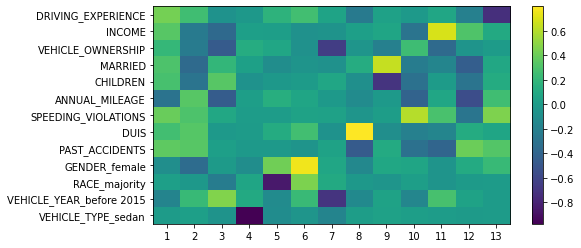

In [99]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(variables.columns)), variables.columns)
plt.xticks(range(len(variables.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

Habiendo visto el grafico tipo heatmap, tampoco es facil identificar claramete por componente (PC) los tipos de variables que tienen mas peso en cada una de ellas: eg. si quizas en algún componente las variables socioeconomicas (gender, age, married, race, etc) pesan más que las variables relativas al automovil/uso del automovil (DUIs, vehicle type, etc). Pero parece que los componentes (PC) tienen unos pesos variados entre los dos principales tipos de variables que conforman el dataset.

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.25531798 0.10934711 0.09346203 0.07728682 0.07644435 0.07493994
 0.06478773 0.05798058 0.05404065 0.04452374 0.04009365 0.03400834
 0.01776709]


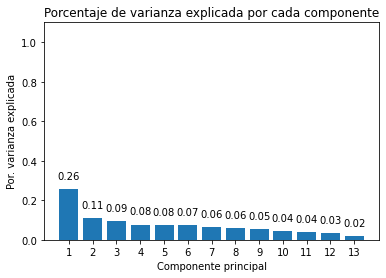

In [100]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(variables.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

En este caso, la primera componente explica el 26% de la varianza observada en los datos y la segunda el 11%, a partir de la tercera componente el % que cada componente explica disminuye de forma gradual un 1% hasta el 2% que explica la última.

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.25531798 0.36466508 0.45812712 0.53541394 0.61185829 0.68679823
 0.75158596 0.80956654 0.86360719 0.90813093 0.94822457 0.98223291
 1.        ]


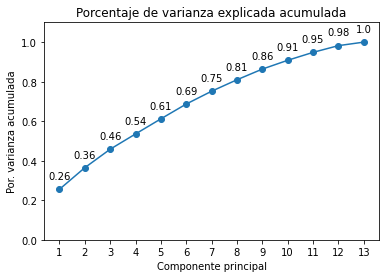

In [101]:
# Porcentaje de varianza acumulada explicada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(variables.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(variables.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');



Vemos que entre las 8 primeras Componente Principales hay un % de varianza explicada de 81%, que es un % muy bueno y nos supone trabajar con 8 variables em lugar de 13, lo cual simplifica bastante la complejidad al ser 5 varibles menos.